# 10 Academy Week 11 – Task 1: Foundation & EDA  
**Change Point Analysis of Brent Oil Prices**  
Interim submission preparation (due 08 Feb 2026, 20:00 UTC)

## 1. Imports & Setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. Load & Prepare Data  
**Assumption**: Dataset is `brent_oil_prices.csv` with columns `Date` and `Price`  
Date format examples seen: `'20-May-87'`, `'15-Jun-2020'`, etc.

In [9]:
data_path = "../data/BrentOilPrices.csv"  # adjust path if needed

try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print("Error: Dataset not found. Please place brent_oil_prices.csv in the data/ folder.")
    raise

# Robust date parsing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows where date failed to parse
df = df.dropna(subset=['Date'])

# Sort and set index
df = df.sort_values('Date').set_index('Date')

# Forward-fill missing prices (weekends/holidays)
df['Price'] = df['Price'].ffill()

print("Dataset shape:", df.shape)
print("Date range:", df.index.min().strftime("%Y-%m-%d"), "to", df.index.max().strftime("%Y-%m-%d"))
print(df.head(3))
print("\n", df.tail(3))

C:\Users\Eyasu\AppData\Local\Temp\ipykernel_24048\2192430130.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


Dataset shape: (9011, 1)
Date range: 1987-05-20 to 2022-11-14
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55

             Price
Date             
2022-11-10  94.25
2022-11-11  96.37
2022-11-14  93.59


## 3. Feature Engineering

In [10]:
df['Log_Price']  = np.log(df['Price'])
df['Log_Return'] = df['Log_Price'].diff()
df['Vol_30d']    = df['Log_Return'].rolling(window=30).std() * np.sqrt(252)

## 4. Exploratory Data Analysis (EDA)

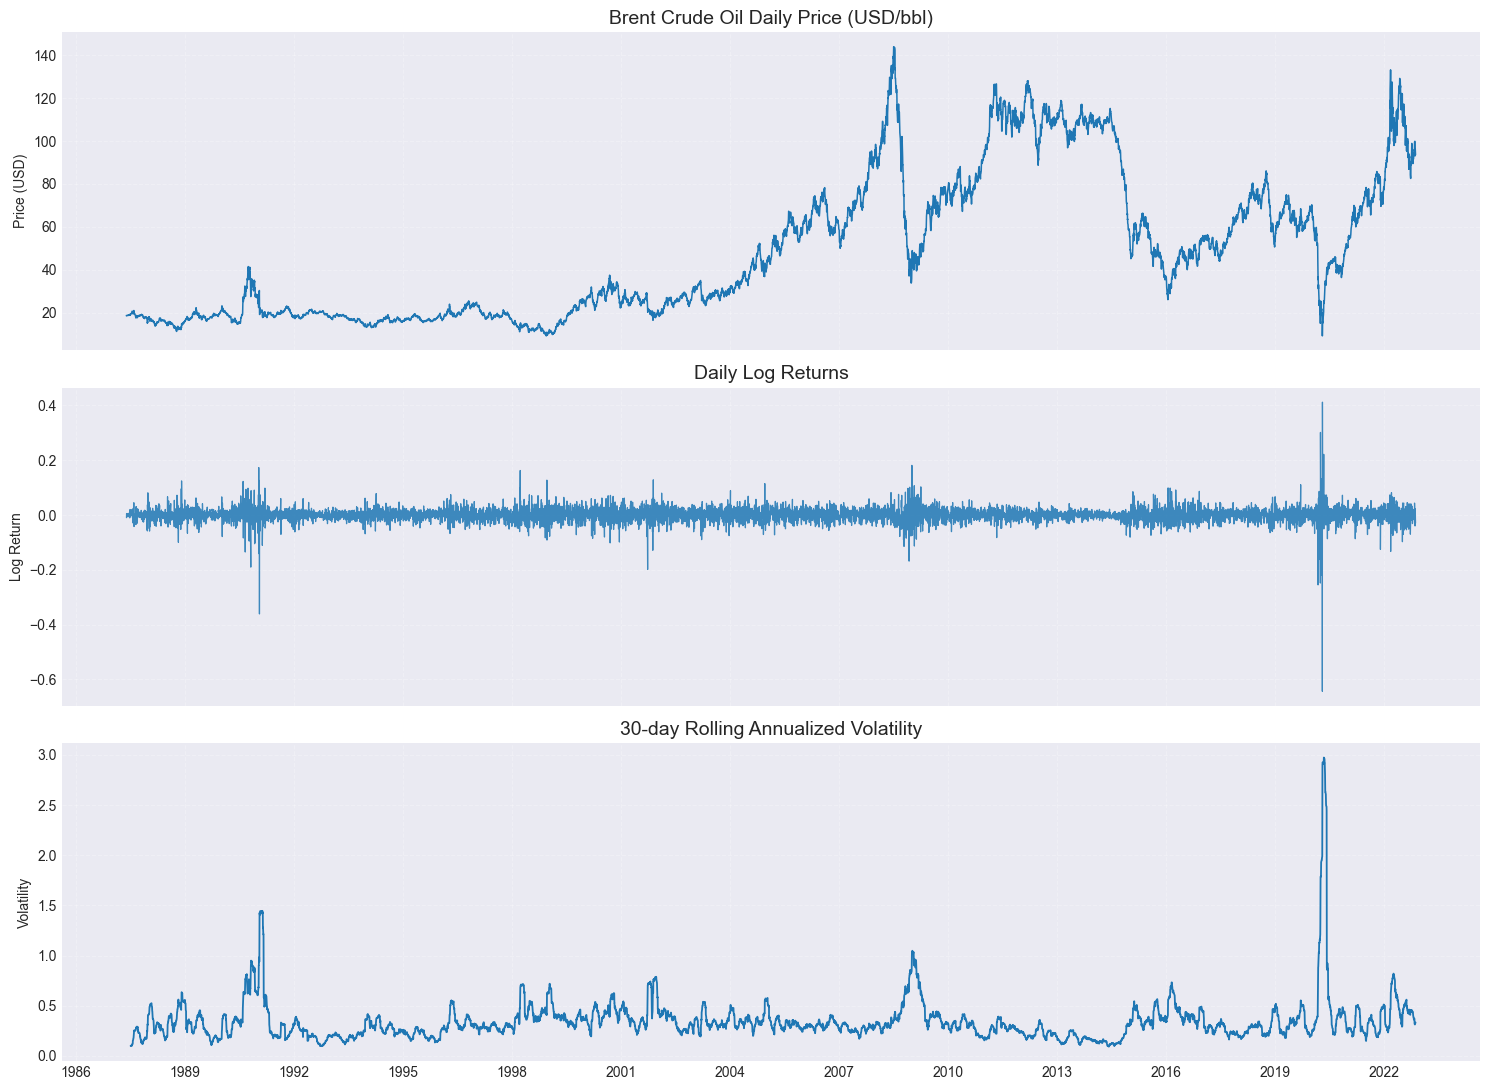

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(15, 11), sharex=True)

# A. Raw Price
axes[0].plot(df.index, df['Price'], lw=1.1)
axes[0].set_title("Brent Crude Oil Daily Price (USD/bbl)", fontsize=14)
axes[0].set_ylabel("Price (USD)")

# B. Daily Log Returns
axes[1].plot(df.index, df['Log_Return'], lw=0.9, alpha=0.85)
axes[1].set_title("Daily Log Returns", fontsize=14)
axes[1].set_ylabel("Log Return")

# C. Rolling Volatility
axes[2].plot(df.index, df['Vol_30d'], lw=1.3)
axes[2].set_title("30-day Rolling Annualized Volatility", fontsize=14)
axes[2].set_ylabel("Volatility")

for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.grid(True, alpha=0.25, linestyle='--')

plt.tight_layout()
plt.show()

## 5. Stationarity Check (ADF Test on Log Returns)

In [12]:
adf = adfuller(df['Log_Return'].dropna())
print("ADF test on Log Returns:")
print(f"  Statistic : {adf[0]:.4f}")
print(f"  p-value   : {adf[1]:.6f}")
print(f"  Conclusion: {'Stationary' if adf[1] < 0.05 else 'Non-stationary'} (5% level)")

ADF test on Log Returns:
  Statistic : -16.4271
  p-value   : 0.000000
  Conclusion: Stationary (5% level)


## 6. Visual Event Overlay (Illustrative Examples)

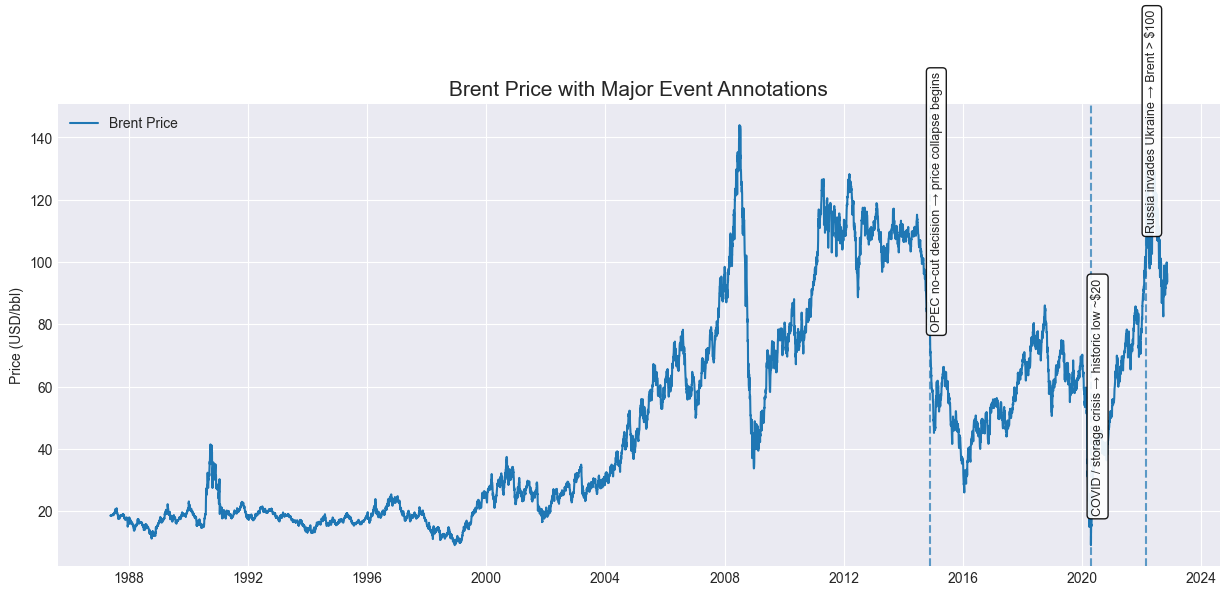

In [13]:
key_events = {
    '2014-11-27': "OPEC no-cut decision → price collapse begins",
    '2020-04-20': "COVID / storage crisis → historic low ~$20",
    '2022-02-24': "Russia invades Ukraine → Brent > $100"
}

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df.index, df['Price'], label='Brent Price')

for date_str, label in key_events.items():
    event_date = pd.to_datetime(date_str)
    idx = df.index.get_indexer([event_date], method='nearest')[0]
    price_level = df.iloc[idx]['Price']

    ax.axvline(event_date, ls='--', alpha=0.7)
    ax.annotate(label, xy=(event_date, price_level * 1.08), rotation=90,
                va='bottom', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.9))

ax.set_title("Brent Price with Major Event Annotations", fontsize=15)
ax.set_ylabel("Price (USD/bbl)")
ax.legend()
plt.show()

## 7. Save Cleaned Dataset for Task 2

In [14]:
clean_path = "../data/brent_cleaned.csv"
df.to_csv(clean_path)
print(f"Cleaned dataset saved → {clean_path}")

Cleaned dataset saved → ../data/brent_cleaned.csv


## Summary – Task 1 Deliverables Checklist
- [ ] This notebook with plots & outputs
- [ ] `interim_report.md` or `.pdf`
- [ ] GitHub `main` branch updated